<a href="https://colab.research.google.com/github/iamkishore0/DS_Projects/blob/main/Medical_insurance_premium_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data preprocessing

Dataset link: https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv

## Importing the libraries and dataset

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
dataset = pd.read_csv('/content/insurance.csv')

## Data exploration

In [69]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [70]:
dataset.shape

(1338, 7)

In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [72]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [73]:
len(dataset.select_dtypes(include='object').columns)

3

In [74]:
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [75]:
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

4

In [76]:
# statistical summary
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Group the dataset by 'sex', 'smoker', 'region'

In [77]:
dataset.groupby('sex').mean()

<ipython-input-77-859a65e13e71>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('sex').mean()


,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [78]:
dataset.groupby('smoker').mean()

<ipython-input-78-7a7d40b4bb92>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('smoker').mean()


,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [79]:
dataset.groupby('region').mean()

<ipython-input-79-a56bc4f3bc6a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('region').mean()


,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


## Dealing with missing values

In [80]:
dataset.isnull().values.any()

False

In [81]:
dataset.isnull().values.sum()

0

## Encoding the categorical data

In [82]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [83]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [84]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [85]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [86]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [87]:
# one hot encoding

dataset = pd.get_dummies(data=dataset, drop_first=True)

In [88]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [89]:
dataset.shape

(1338, 9)

## Correlation matrix

In [90]:
dataset_2 = dataset.drop(columns='charges')

<Axes: title={'center': 'Correlation with Charges'}>

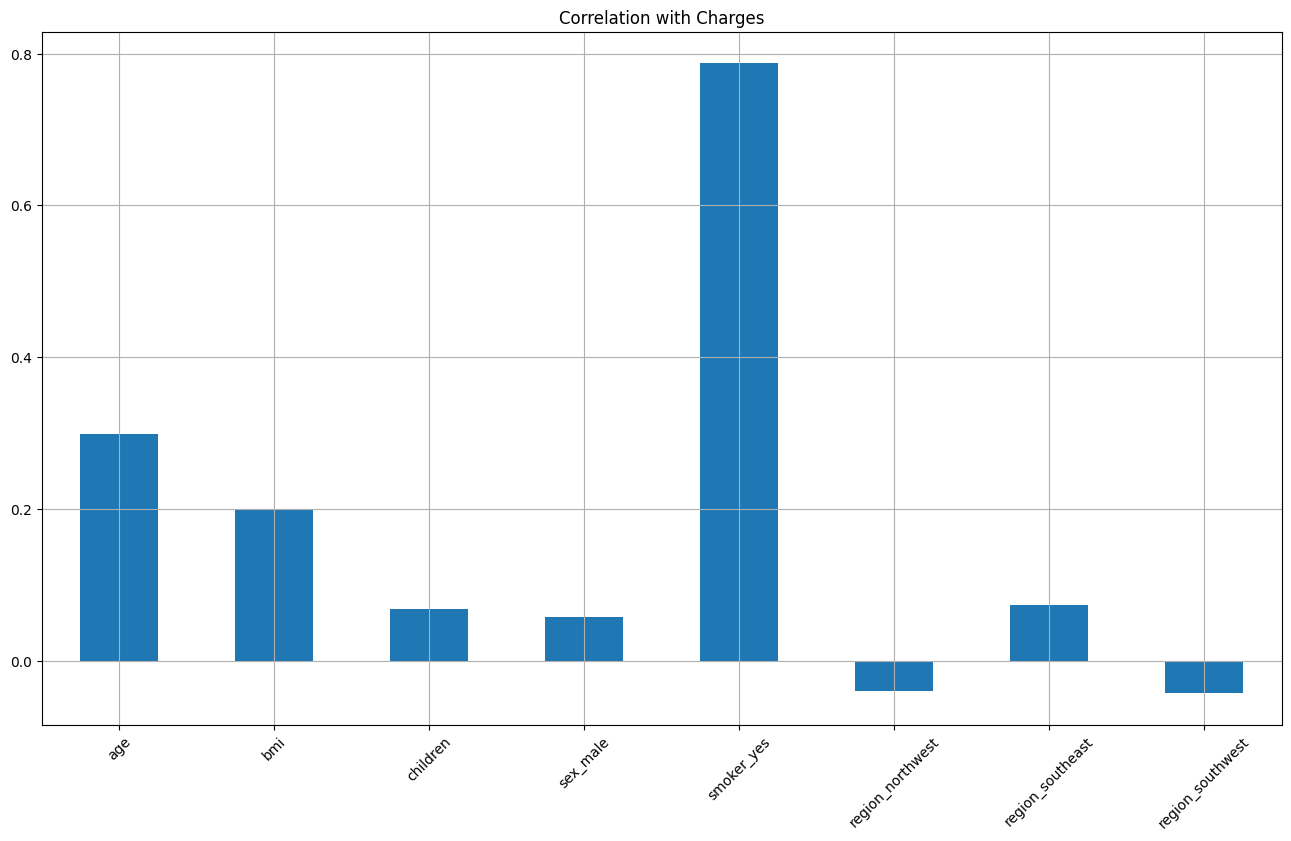

In [91]:
dataset_2.corrwith(dataset['charges']).plot.bar(
    figsize=(16,9), title='Correlation with Charges', rot=45, grid=True
)

In [92]:
corr = dataset.corr()

<Axes: >

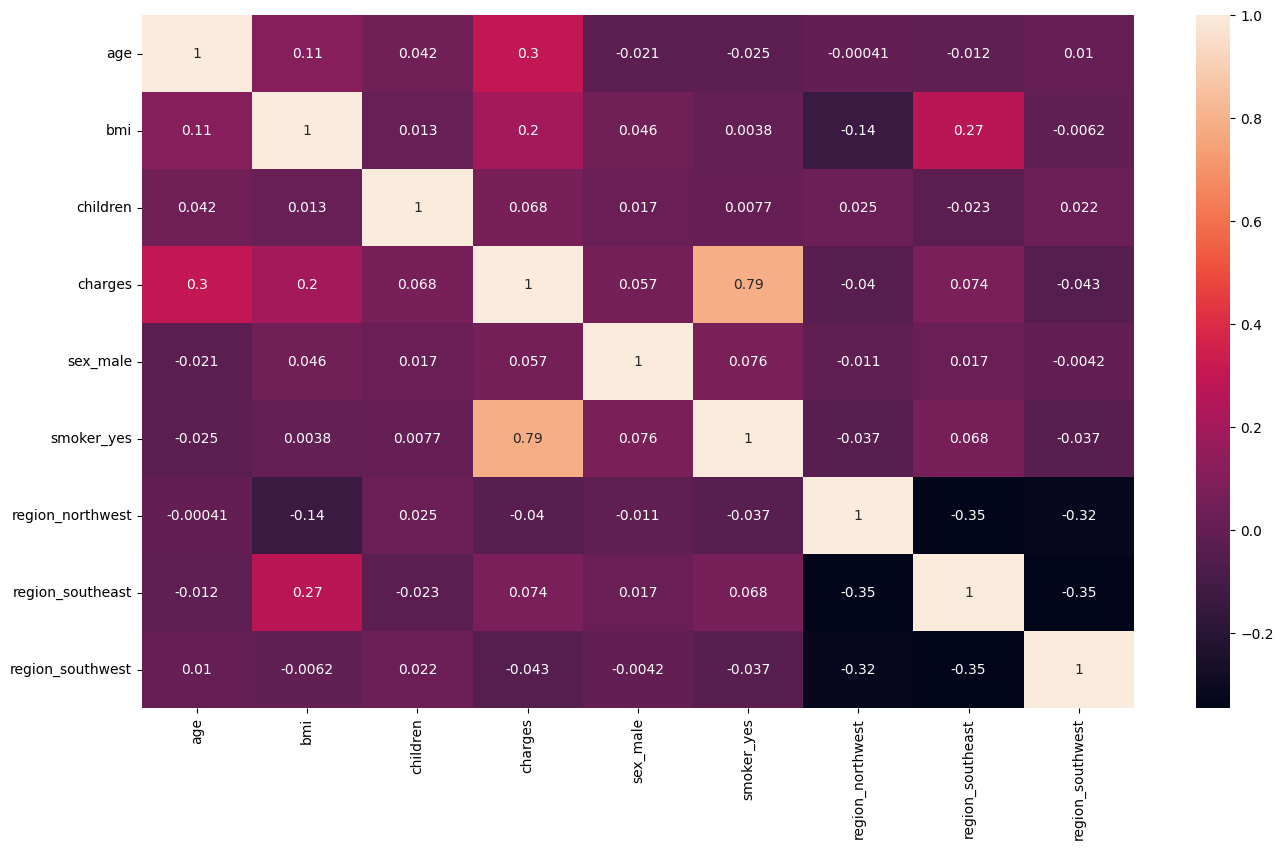

In [93]:
# heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True)

## Splitting the dataset

In [94]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [95]:
# matrix of features / independent variables
x = dataset.drop(columns='charges')

In [96]:
# target / dependent variable
y = dataset['charges']

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [98]:
x_train.shape

(1070, 8)

In [99]:
y_train.shape

(1070,)

In [100]:
x_test.shape

(268, 8)

In [101]:
y_test.shape

(268,)

## Feature scaling

In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [103]:
x_train

array([[-0.14853305,  0.54530479,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59867181, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96092064,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77656186, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97749955, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [104]:
x_test

array([[ 0.91668389, -0.08539629, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [ 0.56161157, -0.21962242, -0.06565939, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.63262604,  1.59081313,  0.76087642, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       ...,
       [ 1.2717562 ,  1.54472343, -0.89219519, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       [-0.64563429,  1.34581001,  1.58741222, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.49059711, -0.95948331,  1.58741222, ..., -0.55791981,
        -0.6155209 , -0.58526447]])

# Part 2: Building the model

## 1) Multiple linear regression

In [105]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(x_train, y_train)

LinearRegression()

In [106]:
y_pred = regressor_lr.predict(x_test)

In [107]:
from sklearn.metrics import  r2_score

In [108]:
r2_score(y_test, y_pred)

0.7999876970680433

## 2) Random forest regression

In [109]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [110]:
y_pred = regressor_rf.predict(x_test)

In [111]:
r2_score(y_test, y_pred)

0.8825607060126637

## 3) XGBoost regression

In [112]:
from xgboost import XGBRFRegressor
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [113]:
y_pred = regressor_xgb.predict(x_test)

In [114]:
r2_score(y_test, y_pred)

0.8953971644895995

# Part 3: Predict charges for a new customer

## example 1

Name: Frank, age: 40, sex: 1, bmi:45.50, children:4, smoker:1, region:northeast


In [115]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [116]:
frank_obs = [[40, 45.5, 4, 1, 1, 0, 0, 0]]

In [117]:
regressor_xgb.predict(sc.transform(frank_obs))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([43257.93], dtype=float32)

## Example 2

Name: Sara, age:19, bmi:27.9, children:0, sex:female, smoker:no, region: northwest

In [118]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [119]:
sara_obs = [[19, 27.9, 0, 0, 0, 1, 0, 0]]

In [120]:
sara_obs

[[19, 27.9, 0, 0, 0, 1, 0, 0]]

In [121]:
regressor_xgb.predict(sc.transform(sara_obs))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2441.4966], dtype=float32)